In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #--spearman coeficient
#import statistics as stats #--deviation
import collections
import glob
import os
#%pylab inline
betas=[float(i) for i in range(1,11)]
numsNNB=[300,300,25,30,30,30,20,20,20,15]
exe = "/home/valentina/Skeleton/HackingLSSCode/bin/LSS_BSK_calc" #local
#exe = "/hpcfs/home/mv.garcia/HackingLSSCode/bin/./LSS_BSK_calc" #remote - magnus

In [28]:
def entropy(ruta,archivo, rutaSalida,beta,numNNB): #ruta es el file del catalogo. Salida es la 'extensión' para identificar i.e '.bskel_shell'
    #--Solo para un archivo de txt, un solo beta
    "Calcular BS"
    #nombre=input("Nombre del archivo: ")
    #rutaSalida = "{}/{}".format(rutaSalida, nombre + str(int(beta)))
    #rutaSalida=rutaSalida+str(int(beta))    
    path_beta="{}/Skeleton/{}.bskel{}.BSKIndex".format(ruta,rutaSalida,str(int(beta)))
    if(os.path.exists(path_beta)==False):
        comm = "{} -input {} -output {} -beta {} -printinfo false -numNNB {}".format(exe, archivo, rutaSalida+str(int(beta)),beta,numNNB)
        #print(comm)
        os.system(comm)
    "Cargar"
    data=np.loadtxt(path_beta)
    data=data.flatten()
    original=np.loadtxt(archivo)
    "Contar"
    contador=collections.Counter(data)
    nodos=np.array(list(contador))
    contador_repeticiones=collections.Counter(contador.values())
    "Añadir ceros"
    n_total=len(original)
    n_beta=len(nodos)
    diferencia=n_total-n_beta
    if((diferencia)>0):
        contador_repeticiones.update({0:diferencia})
    repeticiones=list(contador_repeticiones.values())
    "Probabilidades"
    probabilidad=[]
    for i in range(len(contador_repeticiones)): #Aquí yo comparaba todos los betas con el beta1 - si beta2 max de conex era 13 pero en beta1 era 20, yo sacaba la probabilidad de n<=13 - que era 0 pero quizá afectaba 
        """¡DUDA!= en el caso de abajo, n=19 no está pero n=20 sí, eso afecta en algo; es decir debería calcular esa probabilidad aunque sea 0?"""
        probabilidad.append(repeticiones[i]/n_total)
    probabilidad=np.array(probabilidad)
    #print(np.sum(probabilidad))
    #assert(np.sum(probabilidad)==1)
    entropy=-np.sum(probabilidad*np.log(probabilidad))
    return entropy

In [76]:
#Anterior, comparison between shapes - same parameters
"""
def grafica():
    ruta=input("Ruta de la carpeta con los archivos para calcular el skeleton: ")
    files=glob.glob(ruta+"/Original"+"/*.dat")
    #salida=ruta+"/Skeleton" ver como hacer que se guarde allá
    mean=[]
    desviaciones=[]
    for b in range(len(betas)):
        beta_files=[]
        for file in files:
            salida = file.split("/")[-1]
            beta_files.append(entropy(ruta,file,salida,betas[b],numsNNB[b]))
        mean.append(np.mean(beta_files))
        desviaciones.append(stats.pstdev(beta_files))
    plt.errorbar(betas,mean,yerr=desviaciones,fmt="o-")
    plt.savefig(ruta+"/entropy.png")
    plt.ylabel("$Entropy$")
    plt.xlabel("$\\beta$")
    return (mean,desviaciones)
"""

In [27]:
#Para comparar parametros
def grafica():
    ruta=input("Ruta de la carpeta con los archivos para calcular el skeleton: ")
    files=glob.glob(ruta+"/Original"+"/*.dat")
    files.sort()
    #salida=ruta+"/Skeleton" ver como hacer que se guarde allá
    entropias=[]
    #desviaciones=[]
    for b in range(3):
        beta_files=[]
        for file in files:
            salida = file.split("/")[-1]
            beta_files.append(entropy(ruta,file,salida,betas[b],numsNNB[b]))
        entropias.append(beta_files)
    np.savetxt("entropias_param",entropias)#3 filas- 3 betas, 40 columnas - 40 archivos
    return (entropias)

In [29]:
en=grafica() #/home/valentina/Skeleton/Data/Simulaciones/parametros

Ruta de la carpeta con los archivos para calcular el skeleton: /home/valentina/Skeleton/Data/Simulaciones/parametros


In [2]:
parametros=np.loadtxt("/home/valentina/Skeleton/Data/Simulaciones/parametros/box_cosmo_params.dat")
#parametros=np.loadtxt("/hpcfs/home/mv.garcia/Skeleton/Data/Simulaciones/parametros/box_cosmo_params.dat")
H=parametros[:,1]
Lambda=parametros[:,2]
Omega_m =parametros[:,3]
n_s =parametros[:,4]
sigma_8 =parametros[:,5]
w_0 =parametros[:,6]
var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]
en = np.loadtxt("/home/valentina/Skeleton/entropias_param") #--para no tener que volver a correrlo

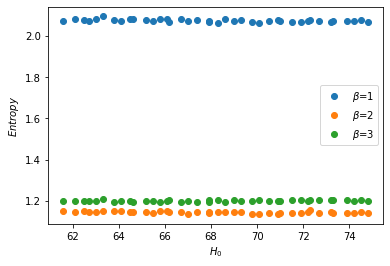

In [4]:
"""
en[0] - entropias con beta1
en[1] - entropias con beta2
en[2] - entropias con beta3
"""
plt.xlabel("$H_0$")
plt.ylabel("$Entropy$")
plt.plot(var[0], en[0], "o", label="$\\beta$=1")
plt.plot(var[0], en[1], "o", label="$\\beta$=2")
plt.plot(var[0], en[2], "o", label="$\\beta$=3")
plt.legend()
plt.savefig("H")

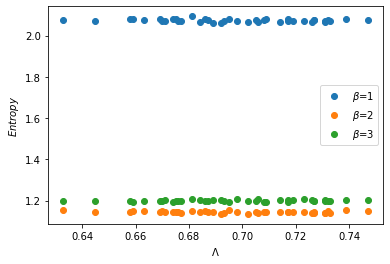

In [47]:
plt.xlabel("$\\Lambda$")
plt.ylabel("$Entropy$")
plt.plot(var[1], en[0], "o", label="$\\beta$=1")
plt.plot(var[1], en[1], "o", label="$\\beta$=2")
plt.plot(var[1], en[2], "o", label="$\\beta$=3")
plt.legend()
plt.savefig("Lambda")

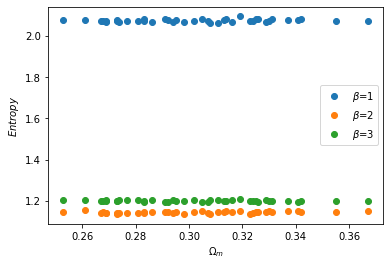

In [39]:
plt.xlabel("$\\Omega_m$")
plt.ylabel("$Entropy$")
plt.plot(var[2], en[0], "o", label="$\\beta$=1")
plt.plot(var[2], en[1], "o", label="$\\beta$=2")
plt.plot(var[2], en[2], "o", label="$\\beta$=3")
plt.legend()
plt.savefig("Omega_m")

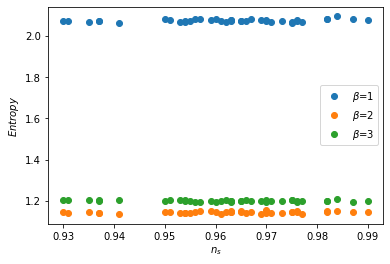

In [40]:
plt.xlabel("$n_s$")
plt.ylabel("$Entropy$")
plt.plot(var[3], en[0], "o", label="$\\beta$=1")
plt.plot(var[3], en[1], "o", label="$\\beta$=2")
plt.plot(var[3], en[2], "o", label="$\\beta$=3")
plt.legend()
plt.savefig("n_s")

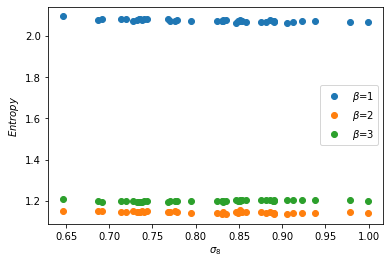

In [41]:
plt.xlabel("$\\sigma_8$")
plt.ylabel("$Entropy$")
plt.plot(var[4], en[0], "o", label="$\\beta$=1")
plt.plot(var[4], en[1], "o", label="$\\beta$=2")
plt.plot(var[4], en[2], "o", label="$\\beta$=3")
plt.legend()
plt.savefig("sigma_8")

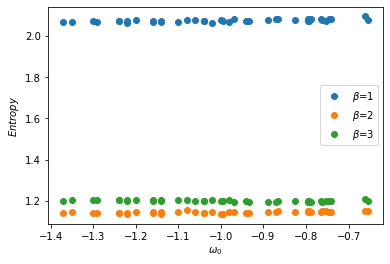

In [44]:
plt.xlabel("$\\omega_0$")
plt.ylabel("$Entropy$")
plt.plot(var[5], en[0], "o", label="$\\beta$=1")
plt.plot(var[5], en[1], "o", label="$\\beta$=2")
plt.plot(var[5], en[2], "o", label="$\\beta$=3")
plt.legend()
plt.savefig("omega_0")

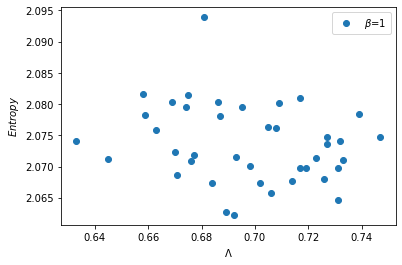

In [49]:

plt.xlabel("$\\Lambda$")
plt.ylabel("$Entropy$")
plt.plot(var[1], en[0], "o", label="$\\beta$=1")
plt.legend()
plt.savefig("Lambda_b1")

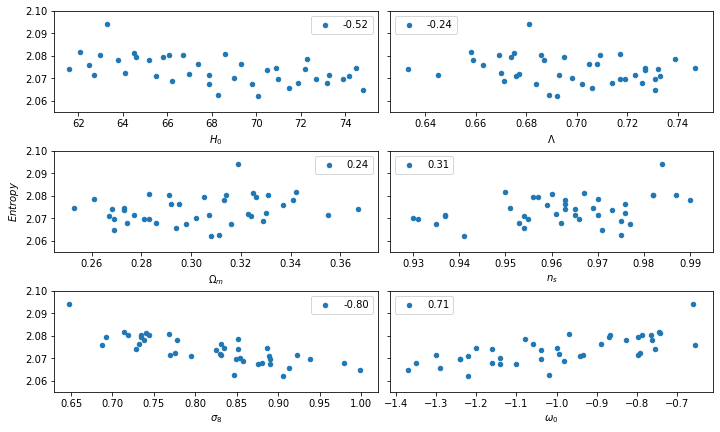

In [53]:
#var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]
plt.figure(figsize=(10,6))

ax1=plt.subplot(321)
plt.ylim(2.055,2.1)
rho1=stats.spearmanr(var[0],en[0])[0]
plt.scatter(var[0], en[0], s=20, marker="o",label="{0:.2f}".format(rho1))
plt.xlabel("$H_0$")
plt.legend()

ax2=plt.subplot(322,sharey=ax1)
plt.ylim(2.055,2.1)
plt.xlim(0.62,0.76)
rho2=stats.spearmanr(var[1],en[0])[0]
plt.scatter(var[1], en[0], s=20, marker="o",label="{0:.2f}".format(rho2))
plt.setp(ax2.get_yticklabels(), visible=False)
plt.axis("auto")
plt.xlabel("$\\Lambda$")
plt.legend(loc='upper left')

#verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
ax3=plt.subplot(323)
plt.ylim(2.055,2.1)
plt.xlim(0.245,0.375)
rho3=stats.spearmanr(var[2],en[0])[0]
plt.ylabel("$Entropy$")
plt.scatter(var[2], en[0], s=20, marker="o",label="{0:.2f}".format(rho3))
plt.xlabel("$\\Omega_m$")
plt.legend()

ax4=plt.subplot(324,sharey=ax1)
plt.ylim(2.055,2.1)
plt.xlim(0.925,0.995)
rho4=stats.spearmanr(var[3],en[0])[0]
plt.scatter(var[3], en[0], s=20, marker="o",label="{0:.2f}".format(rho4))
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel("$n_s$")
plt.legend()

ax5=plt.subplot(325)
plt.ylim(2.055,2.1)
plt.xlim(0.63,1.02)
rho5=stats.spearmanr(var[4],en[0])[0]
plt.scatter(var[4], en[0], s=20, marker="o",label="{0:.2f}".format(rho5))
plt.xlabel("$\\sigma_8$")
plt.legend()

ax6=plt.subplot(326,sharey=ax1)
plt.ylim(2.055,2.1)
rho6=stats.spearmanr(var[5],en[0])[0]
plt.scatter(var[5], en[0], s=20,  marker="o",label="{0:.2f}".format(rho6))
plt.setp(ax6.get_yticklabels(), visible=False)
plt.xlabel("$\\omega_0$")
plt.legend()


plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=0)
#plt.tight_layout()
plt.savefig("param_b1_paper")
plt.show()

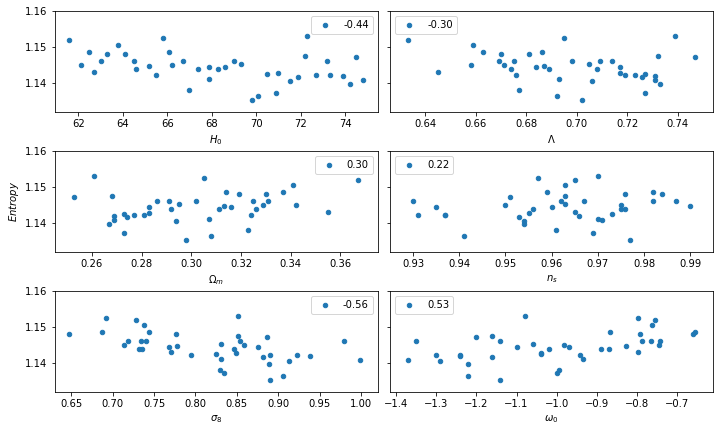

In [60]:
#var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]
plt.figure(figsize=(10,6))

ax1=plt.subplot(321)
plt.ylim(1.132,1.16)
rho1=stats.spearmanr(var[0],en[1])[0]
plt.scatter(var[0], en[1], s=20, marker="o",label=round(rho1,2))
plt.xlabel("$H_0$")
plt.legend()

ax2=plt.subplot(322,sharey=ax1)
plt.ylim(1.132,1.16)
plt.xlim(0.62,0.76)
rho2=stats.spearmanr(var[1],en[1])[0]
plt.scatter(var[1], en[1], s=20, marker="o",label="{0:.2f}".format(rho2))
plt.setp(ax2.get_yticklabels(), visible=False)
plt.axis("auto")
plt.xlabel("$\\Lambda$")
plt.legend(loc='upper left')

#verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
ax3=plt.subplot(323)
plt.ylim(1.132,1.16)
plt.xlim(0.245,0.375)
plt.ylabel("$Entropy$")
rho3=stats.spearmanr(var[2],en[1])[0]
plt.scatter(var[2], en[1], s=20, marker="o",label="{0:.2f}".format(rho3))
plt.xlabel("$\\Omega_m$")
plt.legend()

ax4=plt.subplot(324,sharey=ax1)
plt.ylim(1.132,1.16)
plt.xlim(0.925,0.995)
rho4=stats.spearmanr(var[3],en[1])[0]
plt.scatter(var[3], en[1], s=20, marker="o",label=round(rho4,2))
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel("$n_s$")
plt.legend(loc='upper left')

ax5=plt.subplot(325)
plt.ylim(1.132,1.16)
plt.xlim(0.63,1.02)
rho5=stats.spearmanr(var[4],en[1])[0]
plt.scatter(var[4], en[1], s=20, marker="o",label=round(rho5,2))
plt.xlabel("$\\sigma_8$")
plt.legend()

ax6=plt.subplot(326,sharey=ax1)
plt.ylim(1.132,1.16)
rho6=stats.spearmanr(var[5],en[1])[0]
plt.scatter(var[5], en[1], s=20, marker="o",label=round(rho6,2))
plt.setp(ax6.get_yticklabels(), visible=False)
plt.xlabel("$\\omega_0$")
plt.legend(loc='upper left')

plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=0)
#plt.tight_layout()
plt.savefig("param_b2_paper")
plt.show()

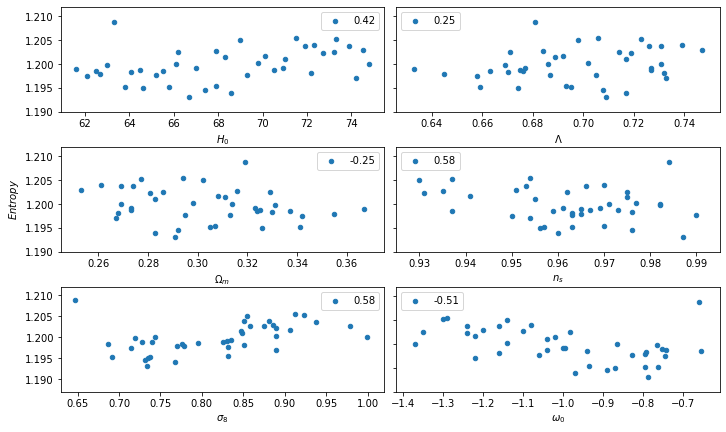

In [55]:
#var=[H,Lambda,Omega_m,n_s,sigma_8,w_0]
plt.figure(figsize=(10,6))

ax1=plt.subplot(321)
plt.ylim(1.19,1.212)
rho1=stats.spearmanr(var[0],en[2])[0]
plt.scatter(var[0], en[2], s=20, marker="o",label=round(rho1,2))
plt.xlabel("$H_0$")
plt.legend()

ax2=plt.subplot(322,sharey=ax1)
#plt.ylim(1.187,1.213)
plt.xlim(0.62,0.76)
rho2=stats.spearmanr(var[1],en[2])[0]
plt.scatter(var[1], en[2], s=20, marker="o",label=round(rho2,2))
plt.setp(ax2.get_yticklabels(), visible=False)
plt.axis("auto")
plt.xlabel("$\\Lambda$")
plt.legend(loc='upper left')

#verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
ax3=plt.subplot(323)
plt.ylim(1.19,1.212)
plt.xlim(0.245,0.375)
plt.ylabel("$Entropy$")
rho3=stats.spearmanr(var[2],en[2])[0]
plt.scatter(var[2], en[2], s=20,  marker="o",label=round(rho3,2))
plt.xlabel("$\\Omega_m$")
plt.legend()

ax4=plt.subplot(324,sharey=ax1)
plt.ylim(1.187,1.212)
plt.xlim(0.925,0.995)
rho4=stats.spearmanr(var[4],en[2])[0]
plt.scatter(var[3], en[2], s=20, marker="o",label=round(rho4,2))
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel("$n_s$")
plt.legend()

ax5=plt.subplot(325)
plt.ylim(1.187,1.212)
plt.xlim(0.63,1.02)
rho5=stats.spearmanr(var[4],en[2])[0]
plt.scatter(var[4], en[2], s=20,marker="o",label=round(rho5,2))
plt.xlabel("$\\sigma_8$")
plt.legend()

ax6=plt.subplot(326,sharey=ax1)
plt.ylim(1.19,1.212)
rho6=stats.spearmanr(var[5],en[2])[0]
plt.scatter(var[5], en[2], s=20, marker="o",label=round(rho6,2))
plt.setp(ax6.get_yticklabels(), visible=False)
plt.xlabel("$\\omega_0$")
plt.legend()

plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=0.0)
#plt.tight_layout()
plt.savefig("param_b3_paper")
plt.show()

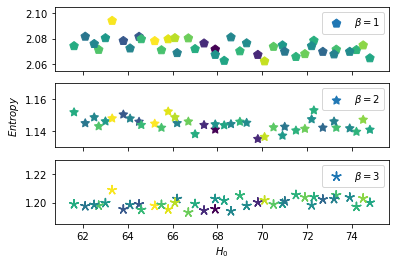

In [102]:
x = np.random.rand(40)
y = np.random.rand(40)
z = np.sqrt(x**2 + y**2)

ax1=plt.subplot(311)
plt.ylim(2.055,2.105)
plt.scatter(var[0], en[0], s=80, c=z, marker=(5,0),label="$\\beta=1$")
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()

ax2=plt.subplot(312,sharex=ax1)
plt.ylim(1.13,1.17)
plt.scatter(var[0], en[1], s=80, c=z, marker=(5, 1),label="$\\beta=2$")
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel("$Entropy$")
plt.legend()

ax3=plt.subplot(313,sharex=ax1)
plt.ylim(1.185,1.23)
plt.scatter(var[0], en[2], s=80, c=z, marker=(5, 2),label="$\\beta=3$")
plt.legend()

plt.xlabel("$H_0$")
plt.savefig("H0_bs")
plt.show()

# IGNORE FROM HERE

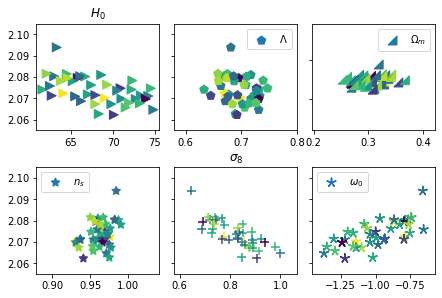

In [98]:
y = np.random.rand(40)
x = np.random.rand(40)
z = np.sqrt(x**2 + y**2)


ax1=plt.subplot(231)
plt.ylim(2.055,2.105)
plt.scatter(var[0], en[0], s=80, c=z, marker=">",label="$H_0$")
#plt.legend()
plt.title("$H_0$")

ax2=plt.subplot(232,sharey=ax1)
plt.ylim(2.055,2.105)
plt.scatter(var[1], en[0], s=80, c=z, marker=(5,0),label="$\\Lambda$")
plt.setp(ax2.get_yticklabels(), visible=False)
plt.legend()

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
ax3=plt.subplot(233)
plt.ylim(2.055,2.105)
plt.scatter(var[2], en[0], s=80, c=z, marker=verts,label="$\\Omega_m$")
plt.setp(ax3.get_yticklabels(), visible=False)
plt.legend()

ax4=plt.subplot(234,sharey=ax1)
plt.ylim(2.055,2.105)
plt.scatter(var[3], en[0], s=80, c=z, marker=(5, 1),label="$n_s$")
plt.legend()

ax5=plt.subplot(235)
plt.ylim(2.055,2.105)
plt.scatter(var[4], en[0], s=80, c=z, marker="+",label="$\\sigma_8$")
plt.setp(ax5.get_yticklabels(), visible=False)
#plt.legend()
plt.title("$\\sigma_8$")

ax6=plt.subplot(236,sharey=ax1)
plt.ylim(2.055,2.105)
plt.scatter(var[5], en[0], s=80, c=z, marker=(5, 2),label="$\\omega_0$")
plt.setp(ax6.get_yticklabels(), visible=False)
plt.legend()

#plt.savefig("param_b1")
plt.tight_layout(pad=0.2, w_pad=0.05, h_pad=0.5)
#plt.tight_layout()

plt.show()

In [18]:
"""
#Util en el futuro
print("{0:.2f}".format(rho1))
print(round(rho1,2))
"""

-0.52
-0.52


Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Observaciones


([2.063018736921204,
  1.2110705215642648,
  1.226548171447159,
  1.2221339326218101,
  1.2025286626225897,
  1.1813848103526527,
  1.1598540794502052,
  1.1392779726432363,
  1.1182904153817488,
  1.0989733050951835],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

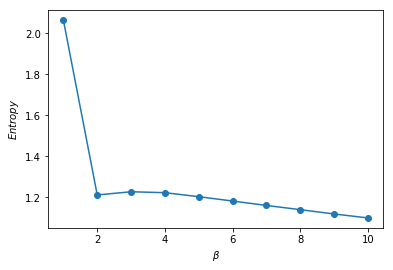

In [77]:
#path="/home/uniandes/Skeleton/Pruebas"
grafica()

Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Spheres


([2.038948033787118,
  1.1377845435627574,
  1.1915096097058628,
  1.2066749887738613,
  1.2019209873145196,
  1.1897445279885188,
  1.1737031812654035,
  1.1563951757317532,
  1.138825996237084,
  1.1215036964857563],
 [0.009996382799450736,
  0.007514459124893268,
  0.007069425450586568,
  0.006512254160578932,
  0.006148455308851882,
  0.005096497371459227,
  0.004976947544838083,
  0.0044700259906337615,
  0.004717073957131634,
  0.005104335237862008])

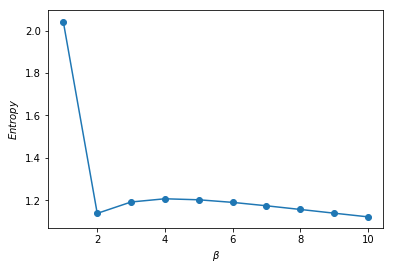

In [78]:
"/home/uniandes/Skeleton/Data/Spheres"
grafica()

Text(0.5,0,'$\\beta$')

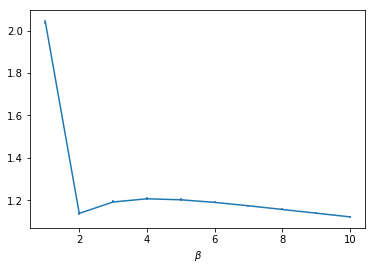

In [71]:
a=[2.038948033787118,
  1.1377845435627574,
  1.1915096097058628,
  1.2066749887738613,
  1.2019209873145196,
  1.1897445279885188,
  1.1737031812654035,
  1.1563951757317532,
  1.138825996237084,
  1.1215036964857563]
b=[0.009996382799450736,
  0.007514459124893268,
  0.007069425450586568,
  0.006512254160578932,
  0.006148455308851882,
  0.005096497371459227,
  0.004976947544838083,
  0.0044700259906337615,
  0.004717073957131634,
  0.005104335237862008]
plt.errorbar(betas,a,yerr=b,fmt="o-")
plt.ylabel("$Entropy$")
plt.xlabel("$\\beta$")

Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Shells


([1.7393218826557713,
  1.0919432366904,
  1.1626398378250637,
  1.1858055003664199,
  1.1864940022012462,
  1.1799739733828682,
  1.169857394657439,
  1.1581600198489554,
  1.1460135929406599,
  1.1336083717111576],
 [0.01710891340768194,
  0.01416091417907344,
  0.013548189428761223,
  0.01196871303271714,
  0.01149252472940336,
  0.011287650669621075,
  0.010198837961094538,
  0.009512326056429111,
  0.009493618473141136,
  0.009322770935492506])

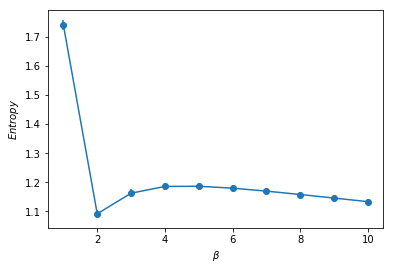

In [79]:
grafica()

Ruta de la carpeta con los archivos para calcular el skeleton: /home/uniandes/Skeleton/Data/Rockstar_halos


([1.9958102148198305,
  1.1255551299880813,
  1.1786840141673,
  1.1950522415516753,
  1.1932540864072285,
  1.184472051863135,
  1.1722575580445078,
  1.1587012760131665,
  1.144733918798713,
  1.1308930133716215],
 [0.005852233434831765,
  0.004767076221656584,
  0.00407415246235232,
  0.002630660628250135,
  0.0020357874396831686,
  0.0020171669194538246,
  0.0018585855523950531,
  0.0021544837587720938,
  0.002405447438535674,
  0.0027941227127122347])

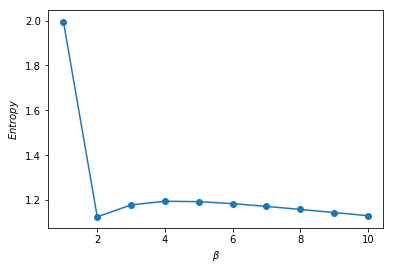

In [80]:
#/home/uniandes/Skeleton/Data/Rockstar_halos/Skeleton 6min
grafica()

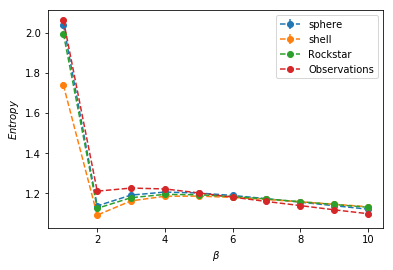

In [87]:
e_shell=[1.7393218826557713, 1.0919432366904, 1.1626398378250637, 1.1858055003664199, 1.1864940022012462, 1.1799739733828682,  1.169857394657439,  1.1581600198489554,  1.1460135929406599,1.1336083717111576]
r_shell=[0.01710891340768194,  0.01416091417907344,  0.013548189428761223, 0.01196871303271714, 0.01149252472940336, 0.011287650669621075, 0.010198837961094538, 0.009512326056429111, 0.009493618473141136, 0.009322770935492506]
e_obs=[2.063018736921204, 1.2110705215642648, 1.226548171447159, 1.2221339326218101, 1.2025286626225897, 1.1813848103526527, 1.1598540794502052, 1.1392779726432363, 1.1182904153817488, 1.0989733050951835]
e_rock=[1.9958102148198305,1.1255551299880813, 1.1786840141673, 1.1950522415516753, 1.1932540864072285, 1.184472051863135, 1.1722575580445078, 1.1587012760131665, 1.144733918798713, 1.1308930133716215],
r_rock=[0.005852233434831765, 0.004767076221656584, 0.00407415246235232, 0.002630660628250135, 0.0020357874396831686, 0.0020171669194538246, 0.0018585855523950531, 0.0021544837587720938, 0.002405447438535674, 0.0027941227127122347]
e_sphere=[2.038948033787118, 1.1377845435627574, 1.1915096097058628, 1.2066749887738613, 1.2019209873145196, 1.1897445279885188, 1.1737031812654035, 1.1563951757317532, 1.138825996237084, 1.1215036964857563]
r_sphere=[0.009996382799450736, 0.007514459124893268, 0.007069425450586568, 0.006512254160578932, 0.006148455308851882, 0.005096497371459227, 0.004976947544838083, 0.0044700259906337615, 0.004717073957131634, 0.005104335237862008]
plt.errorbar(betas,e_sphere,yerr=r_sphere,fmt="o--",label="sphere")
plt.errorbar(betas,e_shell,yerr=r_shell,fmt="o--",label="shell")
plt.errorbar(betas,e_rock,fmt="o--",label="Rockstar")
plt.errorbar(betas,e_obs,fmt="o--",label="Observations")
plt.ylabel("$Entropy$")
plt.xlabel("$\\beta$")
plt.legend()
plt.savefig("entropias")

In [84]:
np.shape(r_shell)

(10,)

In [ ]:
"""
/home/uniandes/Skeleton/Data/Spheres/Skeleton
python obs.py >comandos.sh
chmod u+x comandos.sh
./comandos.sh
"""
        

In [57]:
"""def entropy2(ruta, ruta2): #entrada es el archivo de pares que arroja el beta , ruta 2 es el archivo que meto al beta --Solo para un archivo de txt, un solo beta
    "Cargar"
    data=np.loadtxt(ruta)
    data=data.flatten()
    original=np.loadtxt(ruta2)
    "Contar"
    contador=collections.Counter(data)
    nodos=np.array(list(contador))
    contador_repeticiones=collections.Counter(contador.values())
    "Añadir ceros"
    n_total=len(original)
    n_beta=len(nodos)
    diferencia=n_total-n_beta
    if((diferencia)>0):
        contador_repeticiones.update({0:diferencia})
    repeticiones=list(contador_repeticiones.values())
    "Probabilidades"
    probabilidad=[]
    for i in range(len(contador_repeticiones)): #Aquí yo comparaba todos los betas con el beta1 - si beta2 max de conex era 13 pero en beta1 era 20, yo sacaba la probabilidad de n<=13 - que era 0 pero quizá afectaba 
        """"""¡DUDA!= en el caso de abajo, n=19 no está pero n=20 sí, eso afecta en algo; es decir debería calcular esa probabilidad aunque sea 0?
        probabilidad.append(repeticiones[i]/n_total)
    probabilidad=np.array(probabilidad)
    print(np.sum(probabilidad))
    assert(np.sum(probabilidad)==1)
    entropy=-np.sum(probabilidad*np.log(probabilidad))
    return entropy"""

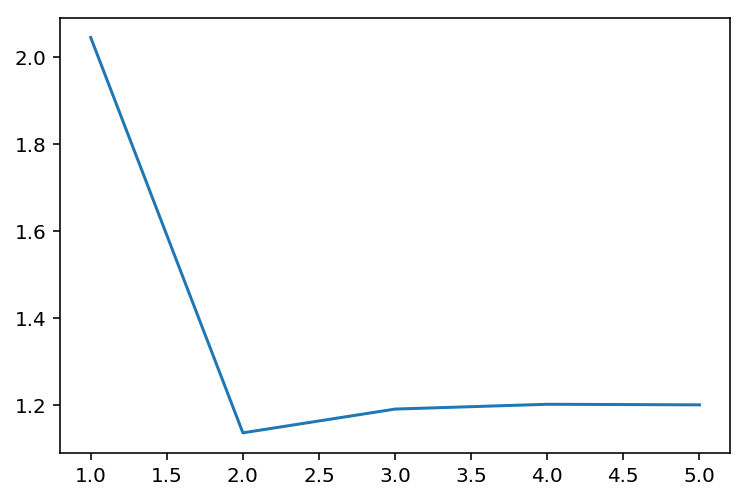

In [63]:
"""betas=[1,2,3,4,5]
plt.plot(betas,probas)"""